In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import IPython.display as ipd

## Creating and Playing Sine Wave Sound

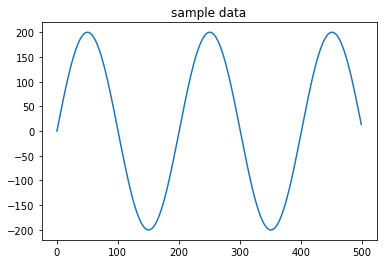

In [41]:
framerate = 44100
f = 220
#t = np.linspace(0,5,framerate*5)
#data = np.sin(2*np.pi*f*np.sin(10*t**2))

x = np.arange(samples*1000)
data = 200*np.sin(2*np.pi*f*x/framerate)
plt.plot(x[:500],data[:500])
plt.title("sample data")

ipd.Audio(data,rate=framerate)

## Real Sinusoid
## $x = A*\sin({2\pi f t+\phi})$ 

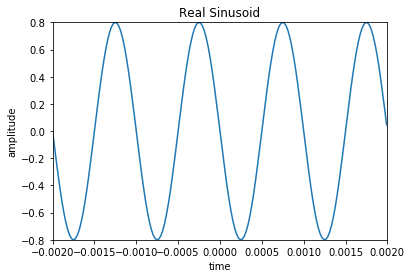

In [30]:
A = 0.8 # ampliude
f0 = 1000 # Frequency
phi = np.pi/2 # initial phase
fs = 44100 # sampling rate
t = np.arange(-0.002,0.002, 1.0/fs)  # time 

x = A * np.cos(2*np.pi*f0*t+phi) 

plt.plot(t,x)
plt.axis([-0.002,0.002,-0.8,0.8])
plt.xlabel("time")
plt.ylabel('amplitude')
plt.title("Real Sinusoid")
plt.show()


## Complex Sinusoid
## $s = e^{j2\pi k n/N} = cos(j2\pi k n/N) + jsin(j2\pi k n/N)$ 
## $s = e^{-j2\pi k n/N} = cos(j2\pi k n/N) - jsin(j2\pi k n/N)$ 

### Euler's Identity

### $e^{j\theta} = cos(\theta) + jsin(\theta)$
### $e^{-j\theta} = cos(\theta) - jsin(\theta)$


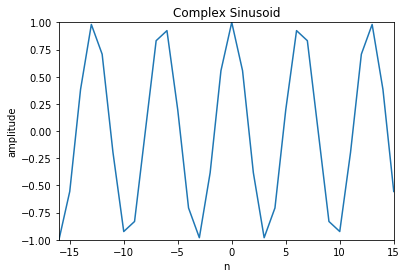

In [32]:
N = 32
k = 5
n = np.arange(-N/2,N/2)

s = np.exp(1j*2*np.pi*k*n/N)
plt.plot(n,np.real(s))
plt.axis([-N/2,N/2-1,-1,1])
plt.xlabel('n')
plt.ylabel('amplitude')
plt.title("Complex Sinusoid")
plt.show()


## DFT (Discrete Fourier Transform)



### $X[K] = \sum_{n=1}^{N-1} x[n] * e^{-j2\pi k n/N} \space \space K=0,1,2,....N-1$  


For **Real Sinusoids** DFT $X[K] = N*\frac{A}{2} \space \space \space for \space k=k_0,-k_0 $ and 0 for rest

For **Complex Sinusoids** DFT $X[K] = N* \space \space \space for \space k=k_0 $ and 0 for rest

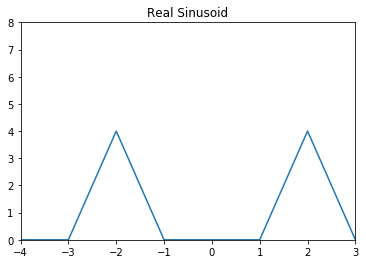

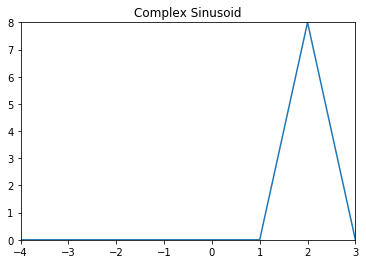

In [60]:
def DFT(N,k0,x,title):
    X = np.array([])
    nv = np.arange(-N/2,N/2)
    kv = np.arange(-N/2,N/2)
    for k in kv:
        s = np.exp(1j*2*np.pi*k*nv/N)
        X = np.append(X,sum(x*np.conjugate(s)))

    plt.plot(kv,abs(X))
    plt.axis([-N/2,N/2-1,0,N])
    plt.title(title)
    plt.show()
    
N = 8
k0 = 2

x = np.cos(2*np.pi*k0*np.arange(N)/N)  ## Real Signal
DFT(N,k0,x,"Real Sinusoid")

x = np.exp(1j*2*np.pi*k0*np.arange(N)/N)  ## Complex Signal 
DFT(N,k0,x,"Complex Sinusoid")



## IDFT (Inverse Discrete Fourier Transform)

### $X[n] = \frac{1}{N}\sum_{n=1}^{N-1} x[K] * e^{j2\pi k n/N} \space \space n=0,1,2,....N-1$  

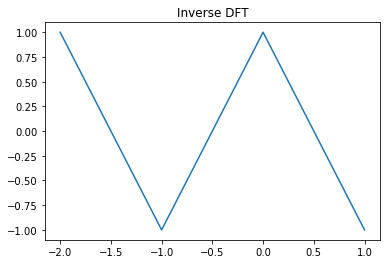

In [61]:
N = 4
k0 = 2
X = [4,0,0,0]
def IDFT(N,k0,X):
    Y = np.array([])
    nv = np.arange(-N/2,N/2)
    kv = np.arange(-N/2,N/2)
    for n in nv:
        s = np.exp(1j*2*n*np.pi*kv/N)
        Y = np.append(Y,1.0/N*sum(X*np.conjugate(s)))

    plt.plot(kv,Y)
    plt.title("Inverse DFT")
    
IDFT(N,k0,X)